# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

#convert UNIX time to String 
from datetime import datetime  

# Import My API key  
from api_keys import api_key
#api_key = "c812965f3b858aaacfcb1d520a8d9fa5"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#check city/country by latitude & longitude
ciudad = citipy.nearest_city(37.56, 126.97)
print(ciudad.city_name+" in "+ciudad.country_code)

seoul in kr


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#call API : https://samples.openweathermap.org/data/2.5/weather?q=London&appid=b6907d289e10d714a6e88b30761fae22 
url = "https://api.openweathermap.org/data/2.5/weather?q="

#one sample
#cities = ["London"]

# inicialize values
urlstr=""
num = 1 
num_set = 1 

a1 = []
b1 = []
c1 = []
d1 = []
e1 = []
f1 = []
g1 = []
h1 = []
i1 = []

#Colums = {"City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"}


print("Beginning Data Retrieval")
print("------------------------")


#get API's value from cities
for x in cities: 
    urlstr = url + x + '&appid=' + api_key

    response = requests.get(urlstr)
    city_data = response.json()
    
    #checker : 
    #print(urlstr)
    #response.url 
    #response.status
    
    #check if there is a result
    codigo = int(city_data["cod"])
    if codigo < 300:
        
        city_data = response.json()
        
        #add to lists
        a1.append(city_data["name"])                #City
        b1.append(city_data["clouds"]["all"])       #Cloudiness
        c1.append(city_data["sys"]["country"])      #Country
        d1.append(city_data["dt"])                  #Date
        e1.append(city_data["main"]["humidity"])    #Humidity
        f1.append(city_data["coord"]["lat"])        #Lat
        g1.append(city_data["coord"]["lon"])        #Lng
        h1.append(city_data["main"]["temp_max"])    #Max Temp
        i1.append(city_data["wind"]["speed"])       #Wind Speed
        j = city_data["id"]                  #City Id = City number        

#display json
#print(json.dumps(city_data, indent=4, sort_keys=True))

        print("Processing Record "+ str(num) +" of Set "+str(num_set)+" | "+city_data["name"]+" id= "+str(j))
        num = num + 1
        if num == 51:
            num = 1
            num_set = num_set+1
    else:
        print("City not found. Skipping... - "+x)

print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | Bredasdorp id= 1015776
Processing Record 2 of Set 1 | Esperance id= 2071860
City not found. Skipping... - juifang
Processing Record 3 of Set 1 | Airai id= 1651810
Processing Record 4 of Set 1 | Chuy id= 3443061
Processing Record 5 of Set 1 | Punta Arenas id= 3874787
Processing Record 6 of Set 1 | Fairbanks id= 5861897
Processing Record 7 of Set 1 | Vilhena id= 3924679
Processing Record 8 of Set 1 | Ushuaia id= 3833367
Processing Record 9 of Set 1 | Bluff id= 2175403
Processing Record 10 of Set 1 | Albany id= 5106834
Processing Record 11 of Set 1 | Sept-Iles id= 6144312
Processing Record 12 of Set 1 | Cravo Norte id= 3685702
Processing Record 13 of Set 1 | Hobart id= 2163355
Processing Record 14 of Set 1 | Nome id= 4732862
Processing Record 15 of Set 1 | Gizo id= 6693679
Processing Record 16 of Set 1 | Codrington id= 2160063
Processing Record 17 of Set 1 | Upernavik id= 3418910
Processing Record 18 of Set 1

Processing Record 40 of Set 3 | Blairmore id= 5903535
Processing Record 41 of Set 3 | Benghazi id= 88319
Processing Record 42 of Set 3 | Nanticoke id= 5202855
Processing Record 43 of Set 3 | Terney id= 2015352
Processing Record 44 of Set 3 | Kirakira id= 2178753
Processing Record 45 of Set 3 | Kahului id= 5847411
Processing Record 46 of Set 3 | Guerrero Negro id= 4021858
City not found. Skipping... - saleaula
City not found. Skipping... - nizhneyansk
Processing Record 47 of Set 3 | Port Elizabeth id= 4501427
Processing Record 48 of Set 3 | Aksu id= 1524298
Processing Record 49 of Set 3 | Richards Bay id= 962367
Processing Record 50 of Set 3 | Hirekerur id= 1270036
Processing Record 1 of Set 4 | Cam Ranh id= 1586350
Processing Record 2 of Set 4 | Victoria id= 1733782
Processing Record 3 of Set 4 | Kaeo id= 2189343
Processing Record 4 of Set 4 | Peruibe id= 3454061
Processing Record 5 of Set 4 | Vila Franca do Campo id= 3372472
City not found. Skipping... - belushya guba
Processing Recor

Processing Record 34 of Set 6 | Provideniya id= 4031574
Processing Record 35 of Set 6 | Leon id= 4864492
Processing Record 36 of Set 6 | Meulaboh id= 1214488
Processing Record 37 of Set 6 | Lasa id= 146639
City not found. Skipping... - yershov
Processing Record 38 of Set 6 | Grand Gaube id= 934479
Processing Record 39 of Set 6 | Virden id= 6174457
Processing Record 40 of Set 6 | Pacific Grove id= 5380437
Processing Record 41 of Set 6 | Glowno id= 3099180
Processing Record 42 of Set 6 | Gat id= 2249901
Processing Record 43 of Set 6 | Qaqortoq id= 3420846
Processing Record 44 of Set 6 | Sibolga id= 1213855
Processing Record 45 of Set 6 | Yafran id= 2208791
City not found. Skipping... - palabuhanratu
Processing Record 46 of Set 6 | Tijuana id= 3981609
Processing Record 47 of Set 6 | Camopi id= 3382226
Processing Record 48 of Set 6 | Chichawatni id= 1181163
Processing Record 49 of Set 6 | Boende id= 218680
Processing Record 50 of Set 6 | Sumoto id= 1851426
Processing Record 1 of Set 7 | Ok

Processing Record 33 of Set 9 | Moranbah id= 6533368
Processing Record 34 of Set 9 | Vung Tau id= 1562414
Processing Record 35 of Set 9 | Hoi An id= 1580541
Processing Record 36 of Set 9 | Mushie id= 2312249
Processing Record 37 of Set 9 | Bemidji id= 5017822
Processing Record 38 of Set 9 | Yar-Sale id= 1486321
Processing Record 39 of Set 9 | Kisangani id= 212730
Processing Record 40 of Set 9 | Vestmanna id= 2610343
Processing Record 41 of Set 9 | Zayukovo id= 463966
Processing Record 42 of Set 9 | Sharon id= 4639684
Processing Record 43 of Set 9 | Mackay id= 5921525
Processing Record 44 of Set 9 | Chalakudi id= 1266452
Processing Record 45 of Set 9 | Campestre id= 3467908
City not found. Skipping... - catamarca
City not found. Skipping... - urumqi
Processing Record 46 of Set 9 | Port Blair id= 1259385
Processing Record 47 of Set 9 | Naze id= 2337542
Processing Record 48 of Set 9 | Libreville id= 2399697
Processing Record 49 of Set 9 | Changji id= 1790885
Processing Record 50 of Set 9 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create DataFrame
weather_data = {"City":a1,"Cloudiness":b1,"Country":c1,"Date":d1,"Humidity":e1,"Lat":f1,"Lng":g1,"Max Temp":h1,"Wind Speed":i1}
weather_data = pd.DataFrame(weather_data)

In [6]:
#Export the city data into a .csv
weather_data.to_csv(output_data_file, index=False)

In [7]:
#display the DataFrame
weather_data.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [8]:
#calculate time
ts = weather_data["Date"].max()
maxDate = datetime.utcfromtimestamp(ts).strftime('%m/%d/%y')
maxDate

'09/08/19'

In [9]:
ts = weather_data["Date"].min()
minDate = datetime.utcfromtimestamp(ts).strftime('%m/%d/%y')
minDate

'09/08/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

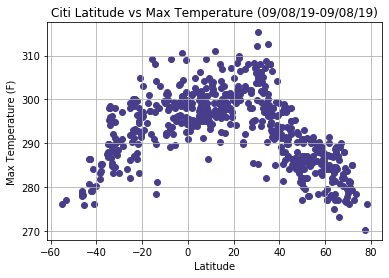

In [10]:
#weather_data.plot(kind='scatter',x='Lat',y='Max Temp',color='blue')
#plt.show()

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", color='darkslateblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Max Temperature ("+minDate+"-"+maxDate+")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

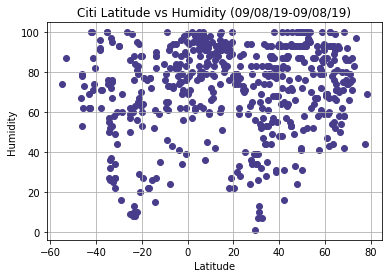

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", color='darkslateblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Humidity ("+minDate+"-"+maxDate+")")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

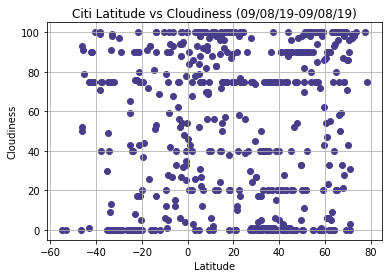

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", color='darkslateblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Cloudiness ("+minDate+"-"+maxDate+")")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

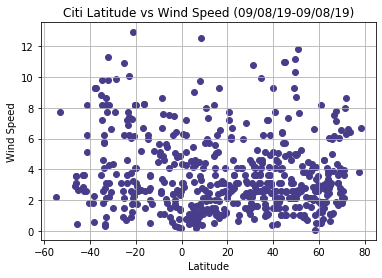

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", color='darkslateblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Wind Speed ("+minDate+"-"+maxDate+")")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Wind Speed.png")

# Show plot
plt.show()